# Simple Linear Regression with Random Data

This notebook demonstrates the basics of simple linear regression using randomly generated data. We'll cover:
- Data generation
- Model fitting
- Results interpretation
- Residual analysis

## 1. Import Libraries

First, we'll import the necessary libraries for our analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Generate Random Data

We'll create a dataset with a known linear relationship: **Y = 10 + 2.5*X + error**

This allows us to compare our estimated coefficients with the true values.

In [3]:
# Generate random data
n_samples = 100
X = np.random.normal(50, 15, n_samples)  # Independent variable (mean=50, std=15)
noise = np.random.normal(0, 5, n_samples)  # Random error term
Y = 10 + 2.5 * X + noise  # Dependent variable: Y = 10 + 2.5*X + error

# Create DataFrame
data = pd.DataFrame({
    'X': X,
    'Y': Y
})

print(f"Generated {n_samples} data points")
print(f"True relationship: Y = 10 + 2.5*X + error")
print("\nData Summary:")
print(data.describe())

Generated 100 data points
True relationship: Y = 10 + 2.5*X + error

Data Summary:
                X           Y
count  100.000000  100.000000
mean    48.442302  131.217279
std     13.622526   33.738138
min     10.703823   38.143013
25%     40.986415  111.380975
50%     48.095656  130.472768
75%     56.089281  148.832179
max     77.784173  204.803247


## 3. Visualize the Data

Let's create a scatter plot to see the relationship between X and Y.

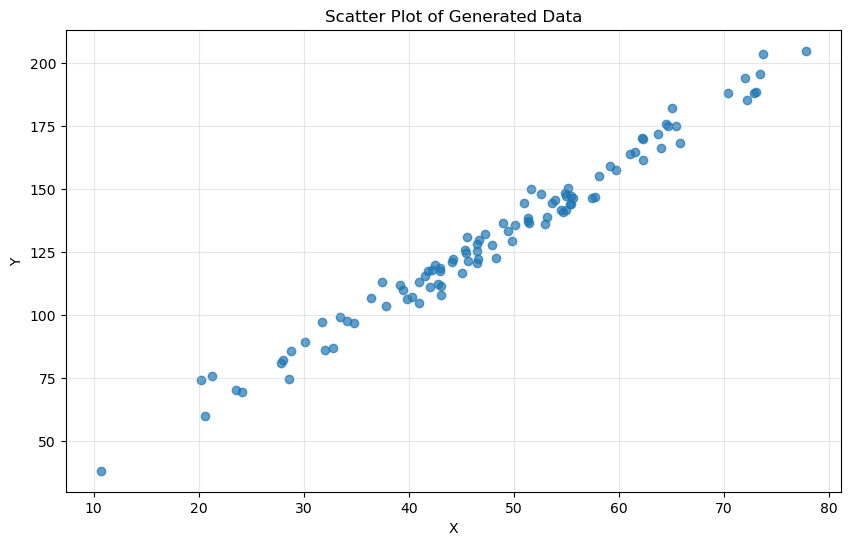

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Generated Data')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Fit the Linear Regression Model

Now we'll fit a simple linear regression model using OLS (Ordinary Least Squares).

In [5]:
# Fit simple linear regression model
model = ols('Y ~ X', data=data).fit()

# Display results
print("REGRESSION RESULTS")
print("="*50)
print(model.summary())

REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     4901.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.71e-85
Time:                        20:45:01   Log-Likelihood:                -296.65
No. Observations:                 100   AIC:                             597.3
Df Residuals:                      98   BIC:                             602.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4248      1.762 

## 5. Extract and Compare Coefficients

Let's extract the estimated coefficients and compare them with the true values.

In [6]:
# Extract coefficients
intercept = model.params['Intercept']
slope = model.params['X']

print(f"Estimated Coefficients:")
print(f"Intercept (β₀): {intercept:.3f}")
print(f"Slope (β₁): {slope:.3f}")
print(f"\nTrue values: Intercept = 10, Slope = 2.5")
print(f"\nDifferences:")
print(f"Intercept error: {abs(intercept - 10):.3f}")
print(f"Slope error: {abs(slope - 2.5):.3f}")

Estimated Coefficients:
Intercept (β₀): 12.425
Slope (β₁): 2.452

True values: Intercept = 10, Slope = 2.5

Differences:
Intercept error: 2.425
Slope error: 0.048


## 6. Visualize the Fitted Line

Let's plot the data points along with the fitted regression line.

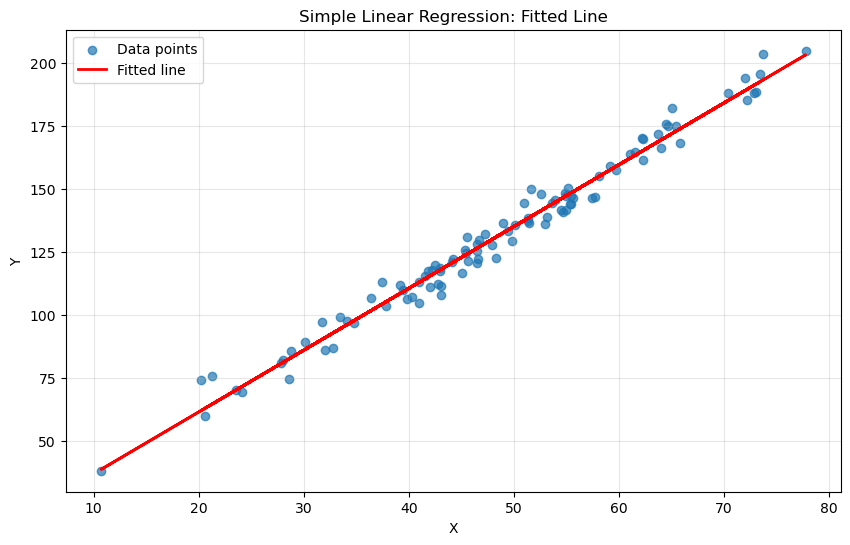

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], alpha=0.7, label='Data points')
plt.plot(data['X'], model.predict(), color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression: Fitted Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Residual Analysis

Residuals are the differences between observed and predicted values. Let's examine them to check our model assumptions.

In [8]:
# Calculate residuals and predictions
residuals = model.resid
predicted = model.predict()

# Add predictions and residuals to dataframe
data['Y_predicted'] = predicted
data['Residuals'] = residuals

print(f"First 10 observations:")
print(data.head(10))

First 10 observations:
           X           Y  Y_predicted  Residuals
0  57.450712  146.549927   153.308131  -6.758204
1  47.926035  127.711862   129.951265  -2.239403
2  59.715328  157.574748   158.861529  -1.286782
3  72.845448  188.102233   191.059834  -2.957601
4  46.487699  125.412820   126.424108  -1.011288
5  46.487946  128.240118   126.424712   1.815406
6  73.688192  203.651410   193.126452  10.524958
7  61.511521  164.651691   163.266239   1.385453
8  42.957884  118.682462   117.768128   0.914335
9  58.138401  154.973772   154.994513  -0.020741


## 8. Residual Plots

Good residual plots should show:
- Random scatter around zero (no patterns)
- Roughly normal distribution of residuals

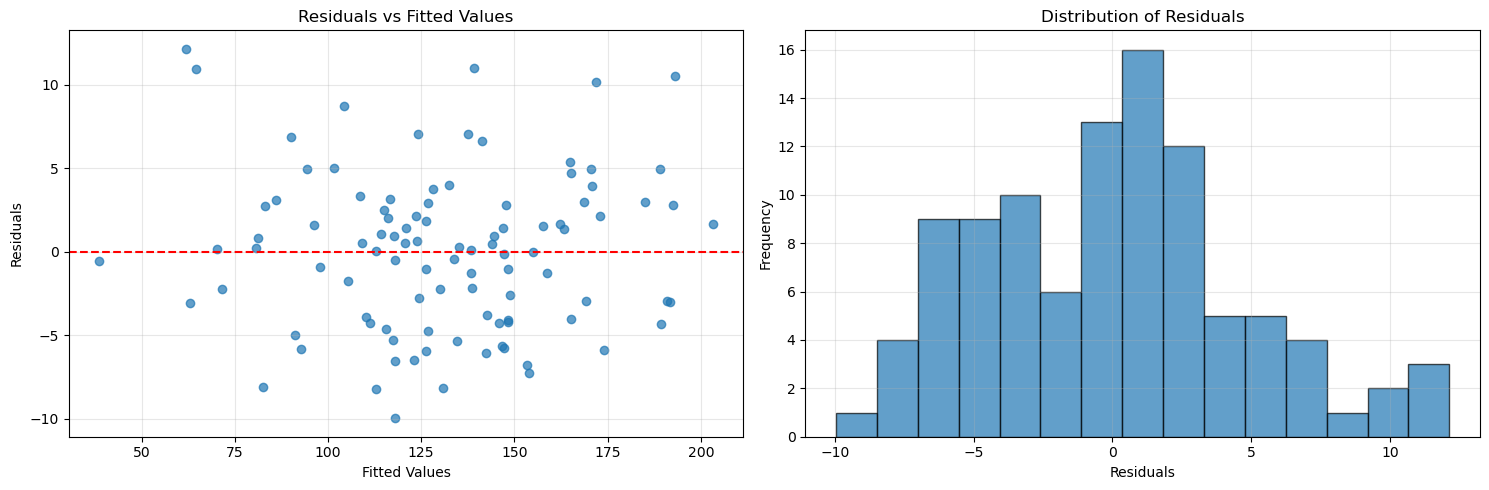

In [9]:
# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Residuals vs Fitted
ax1.scatter(predicted, residuals, alpha=0.7)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')
ax1.grid(True, alpha=0.3)

# Histogram of residuals
ax2.hist(residuals, bins=15, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Model Performance Metrics

Let's calculate key performance metrics to evaluate our model.

In [10]:
# Model performance metrics
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
rmse = np.sqrt(np.mean(residuals**2))

print(f"Model Performance:")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(f"RMSE: {rmse:.4f}")

print(f"\nInterpretation:")
print(f"- R² = {r_squared:.1%} of the variance in Y is explained by X")
print(f"- On average, predictions are off by {rmse:.2f} units")

Model Performance:
R-squared: 0.9804
Adjusted R-squared: 0.9802
RMSE: 4.7001

Interpretation:
- R² = 98.0% of the variance in Y is explained by X
- On average, predictions are off by 4.70 units


## 10. Conclusion

This notebook demonstrated the complete workflow for simple linear regression:

1. **Data Generation**: Created data with a known relationship
2. **Model Fitting**: Used OLS to estimate the relationship
3. **Coefficient Analysis**: Compared estimated vs. true parameters
4. **Visualization**: Plotted data and fitted line
5. **Residual Analysis**: Checked model assumptions
6. **Performance Evaluation**: Calculated key metrics

The model successfully recovered the true relationship, demonstrating that linear regression works well when its assumptions are met!